In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.dates as md
import geopandas as gpd
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer


###### 1. About the project

According to the annual *INRIX Global Traffic Scorecard*, New York City is **the third most** congested city in the world in terms of traffic and the second worst in the United States. The traffic congestion resulted in **211,434 accidents** in 2019. The experts believe that traffic congestion will cost the city $100 billion over the next five years. Through this project, the type and pattern of accidents will be figured out and the solutions also might be provided.


In [2]:
df=pd.read_csv('Motor_Vehicle_Collisions.csv')
atrbt = len(df.columns)
rows = len(df.index)
print('The Dataset has '+ str(atrbt) +' Attributes' + 'and ' + str(rows) + ' rows')

The Dataset has 29 Attributesand 211434 rows


In [3]:
borough=df.groupby(['BOROUGH']).size()
months=df['CRASH DATE'].unique()
aPM=df.groupby(['CRASH DATE', 'BOROUGH']).size()
aPH=df.groupby(['CRASH TIME', 'BOROUGH']).size()

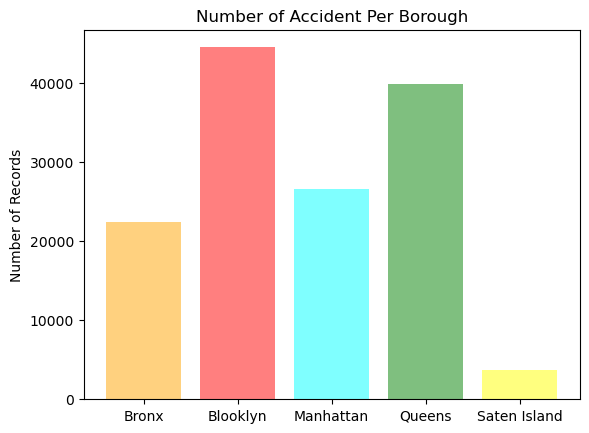

In [4]:
objects = ('Bronx', 'Blooklyn', 'Manhattan', 'Queens', 'Saten Island')
y_pos = np.arange(len(objects))
performance = [borough[0],borough[1],borough[2],borough[3],borough[4]]
plt.bar(y_pos, performance,color=['Orange', 'red', 'cyan', 'green', 'yellow'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Records')
plt.title('Number of Accident Per Borough')
plt.show()

###### Number of Accident Per Borough

**Brooklyn** has the highest number of the accident and *Queens, Manhattan, Bronx, and Staten Island* came next. The result can be due simply to the volume of traffic, but the reason why Manhattan has a lower number of accidents than Brooklyn would be that Manhattan has crowded roads so that cars cannot speed around.


In [5]:
dates = months
x_values = [datetime.datetime.strptime(d,"%b").date() for d in dates]

y_Bronx = [aPM['Jan']['BRONX'], aPM['Feb']['BRONX'], aPM['Mar']['BRONX'], 
           aPM['Apr']['BRONX'], aPM['May']['BRONX'], aPM['Jun']['BRONX'], 
           aPM['Jul']['BRONX'], aPM['Aug']['BRONX'], aPM['Sep']['BRONX'], 
           aPM['Oct']['BRONX'], aPM['Nov']['BRONX'], aPM['Dec']['BRONX']]

y_Brooklyn = [aPM['Jan']['BROOKLYN'], aPM['Feb']['BROOKLYN'], aPM['Mar']['BROOKLYN'], 
           aPM['Apr']['BROOKLYN'], aPM['May']['BROOKLYN'], aPM['Jun']['BROOKLYN'], 
           aPM['Jul']['BROOKLYN'], aPM['Aug']['BROOKLYN'], aPM['Sep']['BROOKLYN'], 
           aPM['Oct']['BROOKLYN'], aPM['Nov']['BROOKLYN'], aPM['Dec']['BROOKLYN']]

y_Manhattan = [aPM['Jan']['MANHATTAN'], aPM['Feb']['MANHATTAN'], aPM['Mar']['MANHATTAN'], 
           aPM['Apr']['MANHATTAN'], aPM['May']['MANHATTAN'], aPM['Jun']['MANHATTAN'], 
           aPM['Jul']['MANHATTAN'], aPM['Aug']['MANHATTAN'], aPM['Sep']['MANHATTAN'], 
           aPM['Oct']['MANHATTAN'], aPM['Nov']['MANHATTAN'], aPM['Dec']['MANHATTAN']]

y_Queens = [aPM['Jan']['QUEENS'], aPM['Feb']['QUEENS'], aPM['Mar']['QUEENS'], 
           aPM['Apr']['QUEENS'], aPM['May']['QUEENS'], aPM['Jun']['QUEENS'], 
           aPM['Jul']['QUEENS'], aPM['Aug']['QUEENS'], aPM['Sep']['QUEENS'], 
           aPM['Oct']['QUEENS'], aPM['Nov']['QUEENS'], aPM['Dec']['QUEENS']]

y_StatenIsland = [aPM['Jan']['STATEN ISLAND'], aPM['Feb']['STATEN ISLAND'], aPM['Mar']['STATEN ISLAND'], 
           aPM['Apr']['STATEN ISLAND'], aPM['May']['STATEN ISLAND'], aPM['Jun']['STATEN ISLAND'], 
           aPM['Jul']['STATEN ISLAND'], aPM['Aug']['STATEN ISLAND'], aPM['Sep']['STATEN ISLAND'], 
           aPM['Oct']['STATEN ISLAND'], aPM['Nov']['STATEN ISLAND'], aPM['Dec']['STATEN ISLAND']]

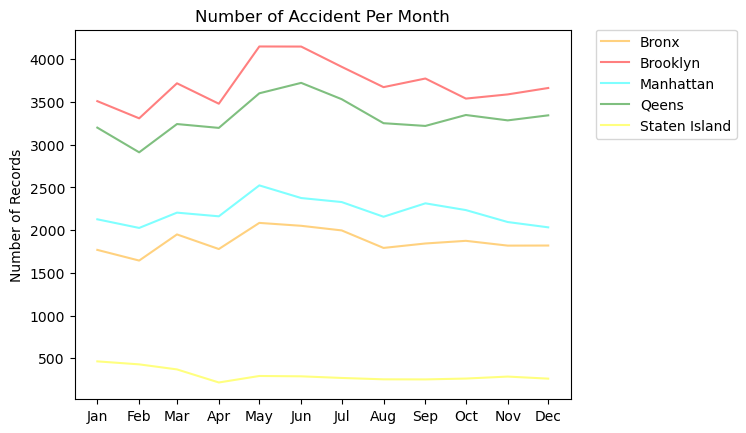

In [6]:
ax = plt.gca()
formatter = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values, y_Bronx, label="Bronx", color='orange', alpha=0.5)
plt.plot(x_values, y_Brooklyn, label="Brooklyn", color='red', alpha=0.5)
plt.plot(x_values, y_Manhattan, label="Manhattan", color='cyan', alpha=0.5)
plt.plot(x_values, y_Queens, label="Qeens", color='green', alpha=0.5)
plt.plot(x_values, y_StatenIsland, label="Staten Island", color='yellow', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Number of Records')
plt.title('Number of Accident Per Month')

plt.show()

###### Crash by Months
Crash by Month shows the accidents were affected by temperature. Except for Manhattan, the number of accidents increased in August which people enjoy various outdoor activities. The graph of the number of motorists injured does not show a wide range of fluctuation, but most of the accidents show a mounting tendency in **May, June, and July**. Whereas, the lowest point of the number of pedestrians was December and January. It seems because most people use public transportation and commute walk.

In [7]:
x_values = np.array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', 
             '15', '16', '17', '18', '19', '20', '21', '22', '23'])

y_Bronx = [aPH[0]['BRONX'], aPH[1]['BRONX'], aPH[2]['BRONX'], 
           aPH[3]['BRONX'], aPH[4]['BRONX'], aPH[5]['BRONX'], 
           aPH[6]['BRONX'], aPH[7]['BRONX'], aPH[8]['BRONX'], 
           aPH[9]['BRONX'], aPH[10]['BRONX'], aPH[11]['BRONX'],
           aPH[12]['BRONX'], aPH[13]['BRONX'], aPH[14]['BRONX'],
           aPH[15]['BRONX'], aPH[16]['BRONX'], aPH[17]['BRONX'],
           aPH[18]['BRONX'], aPH[19]['BRONX'], aPH[20]['BRONX'],
           aPH[21]['BRONX'], aPH[22]['BRONX'], aPH[23]['BRONX']]

y_Brooklyn = [aPH[0]['BROOKLYN'], aPH[1]['BROOKLYN'], aPH[2]['BROOKLYN'], 
           aPH[3]['BROOKLYN'], aPH[4]['BROOKLYN'], aPH[5]['BROOKLYN'], 
           aPH[6]['BROOKLYN'], aPH[7]['BROOKLYN'], aPH[8]['BROOKLYN'], 
           aPH[9]['BROOKLYN'], aPH[10]['BROOKLYN'], aPH[11]['BROOKLYN'],
           aPH[12]['BROOKLYN'], aPH[13]['BROOKLYN'], aPH[14]['BROOKLYN'],
           aPH[15]['BROOKLYN'], aPH[16]['BROOKLYN'], aPH[17]['BROOKLYN'],
           aPH[18]['BROOKLYN'], aPH[19]['BROOKLYN'], aPH[20]['BROOKLYN'],
           aPH[21]['BROOKLYN'], aPH[22]['BROOKLYN'], aPH[23]['BROOKLYN']]

y_Manhattan = [aPH[0]['MANHATTAN'], aPH[1]['MANHATTAN'], aPH[2]['MANHATTAN'], 
           aPH[3]['MANHATTAN'], aPH[4]['MANHATTAN'], aPH[5]['MANHATTAN'], 
           aPH[6]['MANHATTAN'], aPH[7]['MANHATTAN'], aPH[8]['MANHATTAN'], 
           aPH[9]['MANHATTAN'], aPH[10]['MANHATTAN'], aPH[11]['MANHATTAN'],
           aPH[12]['MANHATTAN'], aPH[13]['MANHATTAN'], aPH[14]['MANHATTAN'],
           aPH[15]['MANHATTAN'], aPH[16]['MANHATTAN'], aPH[17]['MANHATTAN'],
           aPH[18]['MANHATTAN'], aPH[19]['MANHATTAN'], aPH[20]['MANHATTAN'],
           aPH[21]['MANHATTAN'], aPH[22]['MANHATTAN'], aPH[23]['MANHATTAN']]

y_Queens = [aPH[0]['QUEENS'], aPH[1]['QUEENS'], aPH[2]['QUEENS'], 
           aPH[3]['QUEENS'], aPH[4]['QUEENS'], aPH[5]['QUEENS'], 
           aPH[6]['QUEENS'], aPH[7]['QUEENS'], aPH[8]['QUEENS'], 
           aPH[9]['QUEENS'], aPH[10]['QUEENS'], aPH[11]['QUEENS'],
           aPH[12]['QUEENS'], aPH[13]['QUEENS'], aPH[14]['QUEENS'],
           aPH[15]['QUEENS'], aPH[16]['QUEENS'], aPH[17]['QUEENS'],
           aPH[18]['QUEENS'], aPH[19]['QUEENS'], aPH[20]['QUEENS'],
           aPH[21]['QUEENS'], aPH[22]['QUEENS'], aPH[23]['QUEENS']]

y_StatenIsland = [aPH[0]['STATEN ISLAND'], aPH[1]['STATEN ISLAND'], aPH[2]['STATEN ISLAND'], 
           aPH[3]['STATEN ISLAND'], aPH[4]['STATEN ISLAND'], aPH[5]['STATEN ISLAND'], 
           aPH[6]['STATEN ISLAND'], aPH[7]['STATEN ISLAND'], aPH[8]['STATEN ISLAND'], 
           aPH[9]['STATEN ISLAND'], aPH[10]['STATEN ISLAND'], aPH[11]['STATEN ISLAND'],
           aPH[12]['STATEN ISLAND'], aPH[13]['STATEN ISLAND'], aPH[14]['STATEN ISLAND'],
           aPH[15]['STATEN ISLAND'], aPH[16]['STATEN ISLAND'], aPH[17]['STATEN ISLAND'],
           aPH[18]['STATEN ISLAND'], aPH[19]['STATEN ISLAND'], aPH[20]['STATEN ISLAND'],
           aPH[21]['STATEN ISLAND'], aPH[22]['STATEN ISLAND'], aPH[23]['STATEN ISLAND']]

Text(0.5, 1.0, 'Number of Accident Per hour')

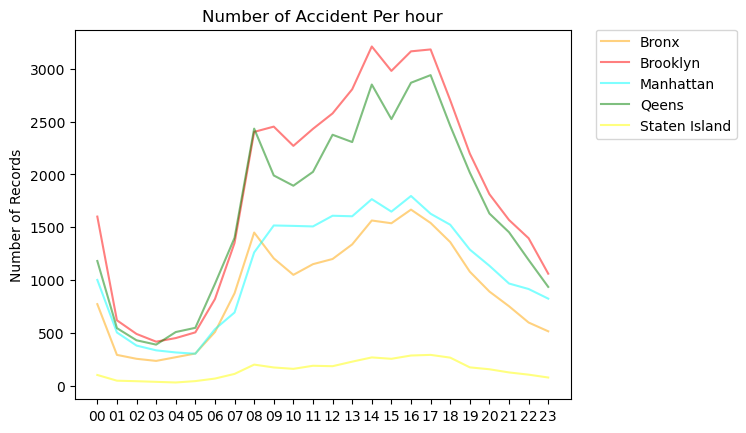

In [8]:
ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(x_values, y_Bronx, label="Bronx", color='orange', alpha=0.5)
plt.plot(x_values, y_Brooklyn, label="Brooklyn", color='red', alpha=0.5)
plt.plot(x_values, y_Manhattan, label="Manhattan", color='cyan', alpha=0.5)
plt.plot(x_values, y_Queens, label="Qeens", color='green', alpha=0.5)
plt.plot(x_values, y_StatenIsland, label="Staten Island", color='yellow', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Number of Records')
plt.title('Number of Accident Per hour')

###### Crash by Hours

When comparing each type of people’s injuries, the graphs show very similar shapes. The number of accidents dramatically increased at **8 am and 6 pm** which is considered as **rush hour**.

In [9]:
shapefile = '/Users/jameen/Desktop/_DataAnalysis/NewYork/ZIP_CODE_040114.shp'
gdf = gpd.read_file(shapefile)[['ZIPCODE', 'geometry']]
gdf.columns = ['boundary', 'geometry']

In [23]:
datafile = 'zipcode.csv'
df = pd.read_csv(datafile, names = ['ZIP CODE', 'NUMBER OF PERSONS INJURED'],skiprows = 1)
df['ZIP CODE']=df['ZIP CODE'].astype(str)
df.sort_values('ZIP CODE',inplace=True, ascending=True)
df = df.groupby(['ZIP CODE']).sum()
by_Zip = df.head(5).sort_values(by=['NUMBER OF PERSONS INJURED'], ascending=False)

In [11]:
#Merge dataframes gdf and df.
merged = gdf.merge(df, how='inner', left_on = 'boundary', right_on = 'ZIP CODE')
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [25]:
geosource = GeoJSONDataSource(geojson = json_data)

palette = brewer['OrRd'][8]

palette = palette[::-1]

color_mapper = LinearColorMapper(palette = palette, low = 481, high = 860)

tick_labels = {'0':'20', '20':'40', '40':'60', '60':'80', '80':'100', '100':'120'}

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

p = figure(title = 'Number of Persons Injured by Zip code', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs','ys', source = geosource,fill_color = {'field' :'NUMBER OF PERSONS INJURED', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

output_notebook()

show(p)

Loading BokehJS ...

In [24]:
by_Zip

NUMBER OF PERSONS INJURED
ZIP CODE                           
10002                           323
10003                           203
10001                           187
10004                            37
10000                            32

###### Number of Persons Injured by Areas

As you see the map and table, the most of accidents are concentrated in one area. Traffic volumes, speed limits, or complexity of roads can be subjects of investigations.